In [1]:
import pandas as pd
scores = pd.read_csv('/data/SPRINT/Qualitative/key_complete.csv')
scores.columns = ['id', 'filename', 'RealTextLabel', 'PlanTextLabel',
                  'RealLabel', 'PlanLabel', 'ExpertReal', 'ExpertPlan']

print(scores.shape)
print(scores.head())

(100, 8)
   id                              filename RealTextLabel PlanTextLabel  \
0   1  00c6ac5cc8c84aaeabd1ea814e818fcd.png          Real      Standard   
1   2  00f76797af244e518e0cf30f3ac7abd5.png          Fake     Intensive   
2   3  02eb854818474bfdb973fabf823dde23.png          Real      Standard   
3   4  0b50b5cdf2cb4d2598aa5308330bfb38.png          Real      Standard   
4   5  0c621dafd8904fdaa628b4a431889088.png          Real      Standard   

   RealLabel  PlanLabel  ExpertReal  ExpertPlan  
0          1          0           3           0  
1          0          1           7           1  
2          1          0           8           0  
3          1          0           3           1  
4          1          0           3           0  


(0, 10)

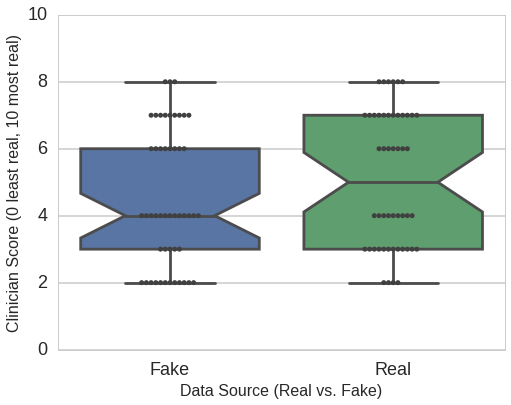

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(context="poster", style='whitegrid', font='sans-serif')

plt.figure(figsize=(8,6))

sns.boxplot(data=scores, x='RealLabel', y='ExpertReal', notch=True)
sns.swarmplot(data=scores, x='RealLabel', y='ExpertReal', color=".25")
plt.xlabel('Data Source (Real vs. Fake)', fontsize=16)
plt.ylabel('Clinician Score (0 least real, 10 most real)',  fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(plt.xticks()[0], ['Fake', 'Real'])

plt.ylim([0, 10])

4    22
7    21
3    17
2    16
6    15
8     9
Name: ExpertReal, dtype: int64


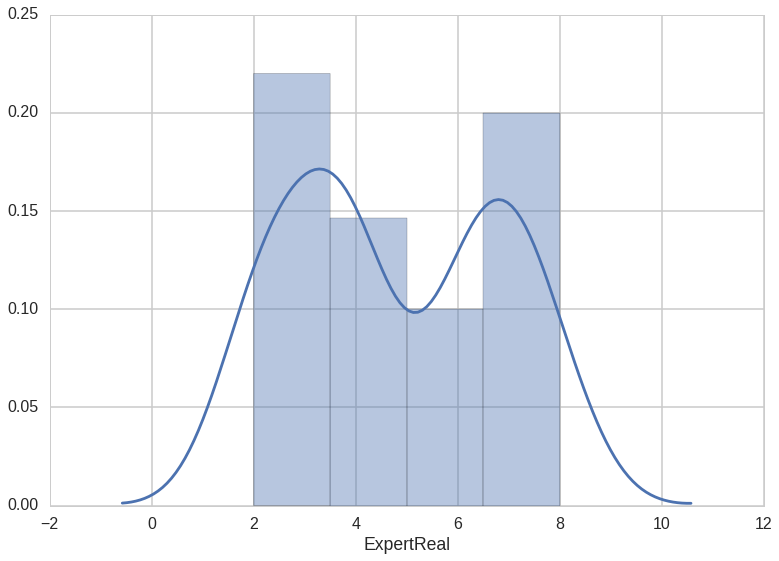

In [14]:
sns.distplot(scores['ExpertReal'])
print(scores['ExpertReal'].value_counts())

5.08
4.52
Ttest_indResult(statistic=1.3822023692989558, pvalue=0.17005181393907429)
MannwhitneyuResult(statistic=1051.5, pvalue=0.082565776492683707)
0.86
0.86


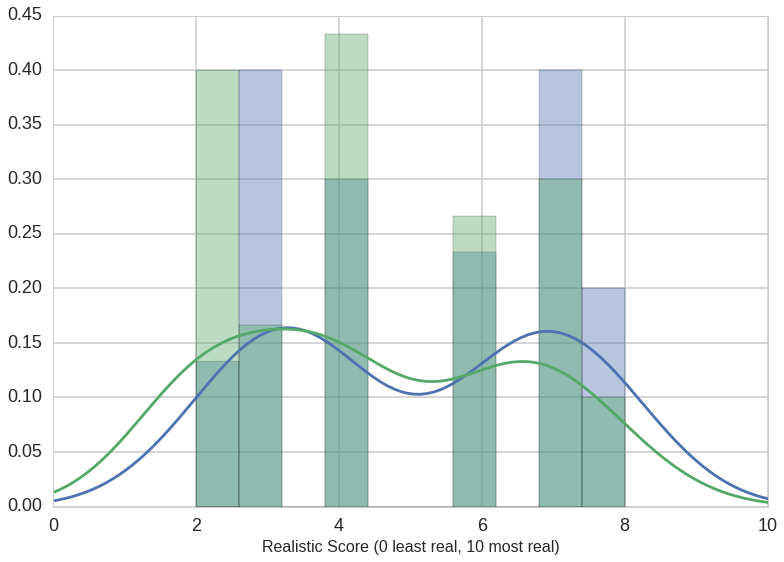

In [17]:
from sklearn.metrics import accuracy_score
from scipy import stats

y_real = scores[scores['RealLabel'] == 1]
y_fake = scores[scores['RealLabel'] == 0]

print(y_real['ExpertReal'].mean())
print(y_fake['ExpertReal'].mean())

print(stats.ttest_ind(y_real['ExpertReal'], y_fake['ExpertReal']))
print(stats.mannwhitneyu(y_real['ExpertReal'], y_fake['ExpertReal']))

sns.distplot(y_real['ExpertReal'], bins=10)
sns.distplot(y_fake['ExpertReal'], bins=10)

plt.xlim([0, 10])
plt.xlabel('Realistic Score (0 least real, 10 most real)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)

print(accuracy_score(y_real['PlanLabel'], y_real['ExpertPlan']))
print(accuracy_score(y_fake['PlanLabel'], y_fake['ExpertPlan']))